In [1]:
import os
import sys
import numpy as np
import matplotlib as plt
sys.path.insert(0, '../')

from colbert.infra import Run, RunConfig, ColBERTConfig
from colbert.data import Queries, Collection
from colbert import Indexer, Searcher

documents_directory = '/home/sarantis/Documents/InformationRetrieval/Project/docs/'

data = []

next_document_id = 0  
for line_idx, filename in enumerate(sorted(os.listdir(documents_directory))):

    with open(os.path.join(documents_directory, filename), 'r') as file:
        content = file.read().replace('\n', ' ') 

    data.append((next_document_id, content))
    
    next_document_id += 1

output_file = '/home/sarantis/Documents/InformationRetrieval/Project/file.tsv'
with open(output_file, 'w', encoding='utf-8', newline='\n') as tsvfile:
    for document_id, content in data:
        tsvfile.write(f"{document_id}\t{content}\n")

print(f"TSV file created at: {output_file}")


TSV file created at: /home/sarantis/Documents/InformationRetrieval/Project/file.tsv


In [2]:
queries_file_path = '/home/sarantis/Documents/InformationRetrieval/Project/Queries_20'

data = []

with open(queries_file_path, 'r', encoding='utf-8') as queries_file:
    for query_number, query in enumerate(queries_file, start=1):
        words = query.strip().split()

        data.append((str(query_number), words))

output_file = '/home/sarantis/Documents/InformationRetrieval/Project/queries.tsv'
with open(output_file, 'w', encoding='utf-8', newline='\n') as tsvfile:
    for query_number, words in data:
        tsvfile.write(f"{query_number}\t{' '.join(words)}\n")

print(f"TSV file created at: {output_file}")

TSV file created at: /home/sarantis/Documents/InformationRetrieval/Project/queries.tsv


In [3]:
dataroot='/home/sarantis/Documents/InformationRetrieval/Project/'
dataset=''
datasplit=''

queries = os.path.join(dataroot, dataset, datasplit, 'queries.tsv')
collection = os.path.join(dataroot, dataset, datasplit, 'file.tsv')

queries = Queries(path=queries)
collection = Collection(path=collection)

f'Loaded {len(queries)} queries and {len(collection):,} passages'

[Jun 21, 10:10:02] #> Loading the queries from /home/sarantis/Documents/InformationRetrieval/Project/queries.tsv ...
[Jun 21, 10:10:02] #> Got 20 queries. All QIDs are unique.

[Jun 21, 10:10:02] #> Loading collection...
0M 


'Loaded 20 queries and 1,209 passages'

In [4]:
print(queries[3])
print()
print(collection[589])
print()


How are salivary glycoproteins from CF patients different from those of normal subjects

CHRONIC BRONCHITIS AND CYSTIC FIBROSIS TWO CHRONIC OBSTRUCTIVE LUNG DISEASES OF ADULTS EDITORIAL AS PATIENTS WITH CYSTIC FIBROSIS SURVIVE LONGER THE NUMBER OF ADULTS WITH THIS CHRONIC OBSTRUCTIVE LUNG DISEASE IS INCREASING RAPIDLY CHRONIC BRONCHITIS AND CYSTIC FIBROSIS ARE SIMILAR IN A NUMBER OF RESPECTS THE TREATMENT OF CYSTIC FIBROSIS AND CHRONIC BRONCHITIS HAS SOME SIMILARITIES BUT CHRONIC BRONCHITIS AND CYSTIC FIBROSIS ALSO DIFFER IN MANY RESPECTS THE PATHOGENESIS OF CHRONIC BRONCHITIS IS MORE CLEARLY RELATED TO EXOGONOUS FACTORS SUCH AS SMOKING AND AIR POLLUTION THAN IS CYSTIC FIBROSIS WHICH IS GENETICALLY DETERMINED CLINICAL DIFFERENCES ALSO EXIST MAJOR DIFFERENCES IN TREATMENT BETWEEN CYSTIC FIBROSIS AND CHRONIC BRONCHITIS ARE CURRENTLY IN VOGUE BECAUSE OF THE SPECIAL PROBLEMS OF ADULTHOOD IT IS APPROPRIATE THAT MANY ADULT PATIENTS WITH CYSTIC FIBROSIS BE CARED FOR BY INTERNISTS WHO HAVE PRE

In [5]:
nbits = 2   # encode each dimension with 2 bits
doc_maxlen = 300   # truncate passages at 300 tokens

checkpoint = 'downloads/colbertv2.0'
index_name = f'{dataset}.{datasplit}.{nbits}bits'


In [6]:
with Run().context(RunConfig(nranks=1, experiment='notebook')):  
    config = ColBERTConfig(doc_maxlen=doc_maxlen, nbits=nbits)

    indexer = Indexer(checkpoint=checkpoint, config=config)
    indexer.index(name=index_name, collection=collection, overwrite=True)



[Jun 21, 10:10:02] #> Note: Output directory /home/sarantis/Documents/InformationRetrieval/Project/ColBERT/experiments/notebook/indexes/..2bits already exists


[Jun 21, 10:10:02] #> Will delete 10 files already at /home/sarantis/Documents/InformationRetrieval/Project/ColBERT/experiments/notebook/indexes/..2bits in 20 seconds...
[Jun 21, 10:10:22] [Pre-Emptying] GPU memory check: r=0, a=0, f=0
[Jun 21, 10:10:22] [Post-Emptying] GPU memory check: r=0, a=0, f=0
#> Starting...
nranks = 1 	 num_gpus = 1 	 device=0
{
    "query_token_id": "[unused0]",
    "doc_token_id": "[unused1]",
    "query_token": "[Q]",
    "doc_token": "[D]",
    "ncells": null,
    "centroid_score_threshold": null,
    "ndocs": null,
    "load_index_with_mmap": false,
    "index_path": null,
    "nbits": 2,
    "kmeans_niters": 20,
    "resume": false,
    "similarity": "cosine",
    "bsize": 64,
    "accumsteps": 1,
    "lr": 1e-5,
    "maxsteps": 400000,
    "save_every": null,
    "warmup": 20000,
    "warmup_b

0it [00:00, ?it/s]

[Jun 21, 10:19:17] [0] 		 #> Saving chunk 0: 	 1,209 passages and 227,010 embeddings. From #0 onward.


1it [04:32, 272.51s/it]
100%|██████████| 4096/4096 [00:00<00:00, 162828.47it/s]


[Jun 21, 10:19:18] [0] 		 #> Checking all files were saved...
[Jun 21, 10:19:18] [0] 		 Found all files!
[Jun 21, 10:19:18] [0] 		 #> Building IVF...
[Jun 21, 10:19:18] [0] 		 #> Loading codes...
[Jun 21, 10:19:18] [0] 		 Sorting codes...
[Jun 21, 10:19:18] [0] 		 Getting unique codes...
[Jun 21, 10:19:18] #> Optimizing IVF to store map from centroids to list of pids..
[Jun 21, 10:19:18] #> Building the emb2pid mapping..
[Jun 21, 10:19:18] len(emb2pid) = 227010
[Jun 21, 10:19:18] #> Saved optimized IVF to /home/sarantis/Documents/InformationRetrieval/Project/ColBERT/experiments/notebook/indexes/..2bits/ivf.pid.pt
[Jun 21, 10:19:18] [0] 		 #> Saving the indexing metadata to /home/sarantis/Documents/InformationRetrieval/Project/ColBERT/experiments/notebook/indexes/..2bits/metadata.json ..
#> Joined...


In [7]:
with Run().context(RunConfig(experiment='notebook')):
    searcher = Searcher(index=index_name, collection=collection)

[Jun 21, 10:19:22] #> Loading codec...
[Jun 21, 10:19:22] Loading decompress_residuals_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...
[Jun 21, 10:19:22] Loading packbits_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...
[Jun 21, 10:19:23] #> Loading IVF...
[Jun 21, 10:19:23] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 6775.94it/s]

[Jun 21, 10:19:23] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 153.76it/s]


In [8]:
query = queries[14] 
print(f"#> {query}")

results = searcher.search(query, k=10)
real_id=0
#query-1 apo tin arxi

# Print the top-k retrieved passages
for passage_id, passage_rank, passage_score in zip(*results):
    print(f"{passage_id}\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {searcher.collection[passage_id]}")

#> What non-invasive tests can be performed for the evaluation of exocrine pancreatic function in patients with CF

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . What non-invasive tests can be performed for the evaluation of exocrine pancreatic function in patients with CF, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1,  2054,  2512,  1011, 17503,  5852,  2064,  2022,  2864,
         2005,  1996,  9312,  1997,  4654, 10085, 11467,  6090, 16748, 12070,
         3853,  1999,  5022,  2007, 12935,   102,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0], device='cuda:0')

795	 [1] 		 19.7 		 PABA SCREENING TEST FOR EXOCRINE PANCREATIC FUNCTION IN INFANTS AND CHILDREN PAMINOBENZOIC ACID PABA IS SPLIT SPECIFICALLY BY PANCREATIC CHYMOTRYPSIN FROM THE SYNTHETIC TRIPEPT

In [9]:

def find_missing_docs():
    docs_directory = '/home/sarantis/Documents/InformationRetrieval/Project/docs'

    total_docs = 1209
    expected_titles = range(1, 1240)

    existing_titles = [int(doc.split('.')[0]) for doc in os.listdir(docs_directory)]

    missing_docs = set(expected_titles) - set(existing_titles)

    return sorted(missing_docs)


def is_between(number, lower_bound, upper_bound):
    return lower_bound <= number <= upper_bound
results_10=[]
missing_docs = find_missing_docs()
for query_index, query_tuple in enumerate(queries):
    query = query_tuple[1]
    token=[]
    print(f"#> Query {query_index + 1}: {query}")

    results = searcher.search(query, k=10)

    for passage_id, passage_rank, passage_score in zip(*results):
    
        title = passage_id
        for i in range(0, len(missing_docs)-2):
            if is_between(title, missing_docs[i], missing_docs[i + 1]):
                title = title + i + 2
                while(title>missing_docs[i + 1]):
                    title+=1
                    i+=1
                break
            elif title < 129:
                title += 1
                break

        passage_content = searcher.collection[passage_id]
        print(f"{title}\t [{passage_rank}] \t\t {passage_score:.1f} \t\t {passage_content}")
        token.append(title)
    results_10.append(token)
    print("\n")


#> Query 1: What are the effects of calcium on the physical properties of mucus from CF patients
533	 [1] 		 23.0 		 EFFECTS OF CALCIUM ON INTESTINAL MUCIN IMPLICATIONS FOR CYSTIC FIBROSIS A MAJOR FEATURE OF THE DISEASE CYSTIC FIBROSIS IS THE EXCESSIVE CONCENTRATION OF MUCUS WITHIN DUCTS AND GLANDS OF MUCOUSPRODUCING ORGANS SOME MUCOUS SECRETIONS ALSO SHOW AN ELEVATION IN CALCIUM CONCENTRATION USING PURIFIED RAT INTESTINAL GOBLET CELL MUCIN AS A MODEL MUCIN WE HAVE INVESTIGATED THE EFFECT OF MILLIMOLAR ADDITIONS 125 MM OF CACL2 ON THE PHYSICAL PROPERTIES OF THE MUCIN ISOTONICITY OF INCUBATION MEDIA WAS PRESERVED IN ORDER TO MIMIC IN VIVO CONDITIONS CACL2 815MM CAUSED A 1533 DECREASE IN VISCOSITY NO CHANGE IN ELECTROPHORETIC MOBILITY IN ACRYLAMIDE GELS AND A 2030 DECREASE IN SOLUBILITY OF THE MUCIN SOLUBILITY CHANGES WERE REVERSED BY THE ADDITION OF EDTA 20 MM TO INCUBATIONS INSOLUBILITY WAS ALSO PRODUCED IN INCUBATIONS OF MUCIN WITH A MIXTURE OF SOLUBLE INTESTINAL CONTENTS NACL WASHING

In [10]:
print(results_10)
results_8 = []
results_6 = []
results_4 = []
results_2 = []

for sublist in results_10:
    results_8.append(sublist[:-2])
    results_6.append(sublist[:-4])
    results_4.append(sublist[:-6])
    results_2.append(sublist[:-8])

print(results_8)
print(results_6)
print(results_4)
print(results_2)

[[533, 441, 957, 484, 827, 741, 505, 960, 1201, 437], [437, 754, 589, 592, 151, 499, 1173, 172, 505, 1125], [633, 1175, 1206, 55, 856, 439, 139, 441, 137, 875], [604, 1039, 711, 374, 23, 876, 536, 439, 928, 1170], [776, 499, 501, 895, 711, 1156, 754, 568, 439, 496], [593, 976, 31, 533, 47, 980, 805, 441, 496, 1120], [441, 633, 856, 1207, 439, 437, 151, 1175, 496, 875], [437, 1207, 1019, 439, 956, 33, 375, 1202, 589, 567], [205, 165, 690, 63, 870, 414, 545, 355, 794, 720], [676, 1115, 1218, 878, 1106, 1066, 30, 1107, 581, 451], [798, 991, 796, 909, 649, 834, 96, 799, 186, 1064], [465, 430, 501, 140, 46, 765, 288, 960, 441, 602], [314, 301, 867, 1076, 1192, 278, 522, 776, 333, 658], [815, 899, 150, 1117, 798, 946, 314, 174, 584, 462], [301, 397, 559, 322, 690, 1192, 822, 296, 266, 475], [301, 1119, 596, 991, 798, 659, 788, 909, 649, 333], [693, 49, 1107, 150, 852, 506, 688, 392, 596, 357], [540, 1016, 1168, 181, 993, 185, 424, 89, 767, 693], [392, 314, 693, 205, 648, 559, 1107, 301, 322,

In [ ]:
num_of_retrieved_values = [10, 8, 6, 4, 2]
recall_values = []
precision_values = []
Harmonic_Mean = []

for num_of_retrieved in num_of_retrieved_values:
    results_list = globals().get(f"results_{num_of_retrieved}")

    if results_list is not None:
        metrics_instance = Metrics(num_of_retrieved, results_list)

        recall = metrics_instance.recall()
        precision = metrics_instance.precision()
        MesiArmonikiTimi = metrics_instance.MesiArmonikiTimi()

        recall_values.append(recall)
        precision_values.append(precision)
        Harmonic_Mean.append(MesiArmonikiTimi)
        print("Harmonic Mean Values:", MesiArmonikiTimi)
        print()

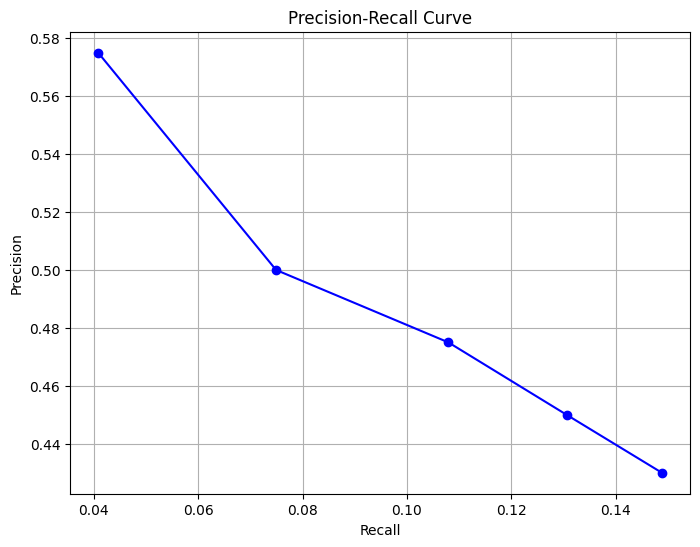

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='o', linestyle='-', color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [ ]:
import csv
csv_file_path='../colBERT.csv'
with open(csv_file_path, mode='w', newline='') as file:
    csv_writer = csv.writer(file)

    csv_writer.writerows(results_10)
    csv_writer.writerow([])
    csv_writer.writerows(results_8)
    csv_writer.writerow([])
    csv_writer.writerows(results_6)
    csv_writer.writerow([])
    csv_writer.writerows(results_4)
    csv_writer.writerow([])
    csv_writer.writerows(results_2)

print(f'Data has been written to {csv_file_path}')

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)

    read_data_lists = list(csv_reader)

print(f'Data has been read from {csv_file_path}: {read_data_lists}')

Data has been written to ../colBERT.csv
Data has been read from ../colBERT.csv: [['533', '441', '957', '484', '827', '741', '505', '960', '1201', '437'], ['437', '754', '589', '592', '151', '499', '1173', '172', '505', '1125'], ['633', '1175', '1206', '55', '856', '439', '139', '441', '137', '875'], ['604', '1039', '711', '374', '23', '876', '536', '439', '928', '1170'], ['776', '499', '501', '895', '711', '1156', '754', '568', '439', '496'], ['593', '976', '31', '533', '47', '980', '805', '441', '496', '1120'], ['441', '633', '856', '1207', '439', '437', '151', '1175', '496', '875'], ['437', '1207', '1019', '439', '956', '33', '375', '1202', '589', '567'], ['205', '165', '690', '63', '870', '414', '545', '355', '794', '720'], ['676', '1115', '1218', '878', '1106', '1066', '30', '1107', '581', '451'], ['798', '991', '796', '909', '649', '834', '96', '799', '186', '1064'], ['465', '430', '501', '140', '46', '765', '288', '960', '441', '602'], ['314', '301', '867', '1076', '1192', '278',